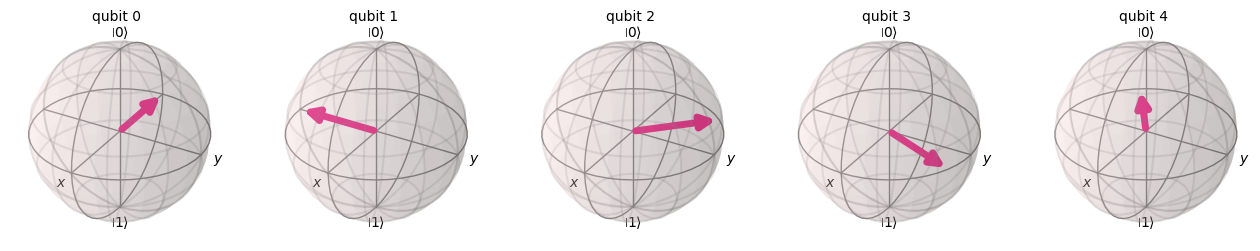

In [15]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

def qft_circuit(n):
    """Creates a QFT circuit on n qubits."""
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i + 1, n):
            qc.cp(np.pi / 2 ** (j - i), j, i)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    return qc

# Generate QFT circuit for 5 qubits with a specific input state
n = 5
qft_5 = QuantumCircuit(n)

# Prepare a specific input state, e.g., |11001⟩
qft_5.x([0, 3, 4])  # Flip the qubits to create |11001⟩

# Append the QFT circuit
qft_5.append(qft_circuit(n), range(n))

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qft_5, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# Visualize the state on the Bloch sphere
plot_bloch_multivector(statevector)


